## \#5

Fit the data to the periodic models $F_3(t) = c_1 + c_2\text{cos}2\pi t + c_3\text{sin}2\pi t$ and $F_4(t) = c_1 + c_2\text{cos}2\pi t + c_3\text{sin}2\pi t + c_4\text{cos}4\pi t$. Find the 2-norm errors $||e||_2$ and compare the fits of $F_3$ and $F_4$. $\\$

t y $\\$
0 0 $\\$
1/6 2 $\\$
1/3 0 $\\$
1/2 -1 $\\$
2/3 1 $\\$
5/6 1 $\\$

For $F_3$ there are three unknowns to find while $F_4$ has four unknowns, so we'll have to change the dimensions of the vectors and matrix accordingly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# number of observations
n = 6

# data 
y = np.array([0, 2, 0, -1, 1, 1])
t = np.arange(n)/n

# number of unknowns and vectors of unknowns - different for the two models 
m1 = 3
m2 = 4
c1 = np.zeros(m1)
c2 = np.zeros(m2)

# create the matrices for the system Ac = b
A1 = np.column_stack((np.ones(n), np.cos(2.*np.pi*t), np.sin(2*np.pi*t)))
A2 = np.column_stack((np.ones(n), np.cos(2.*np.pi*t), np.sin(2*np.pi*t), np.cos(4*np.pi*t)))

# vector of observations (the same for both)
b = y

# least squares soln using the normal equation
c1 = np.linalg.solve(A1.T @ A1, A1.T @ b)
c2 = np.linalg.solve(A2.T @ A2, A2.T @ b)

In [10]:
# comparing the two norms of the residuals
e1 = np.linalg.norm(b - A1 @ c1)
e2 = np.linalg.norm(b - A2 @ c2)
print(f'Error of F3: {e1} \nError of F4: {e2}')

Error of F3: 2.041241452319315 
Error of F4: 1.0801234497346441


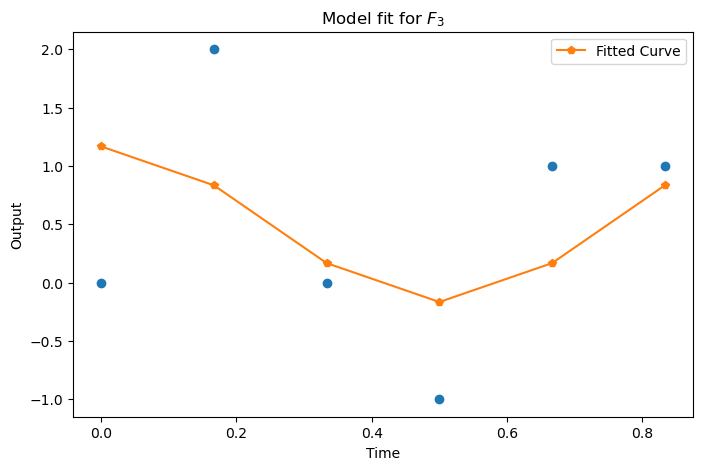

In [13]:
# plotting the fit of the F3 (with the help of AI)
plt.figure(figsize=(8,5))
plt.plot(t, y, 'o')
plt.plot(t, A1 @ c1, 'p-', label = 'Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Model fit for $F_3$')
plt.legend()
plt.grid(False)
plt.show()

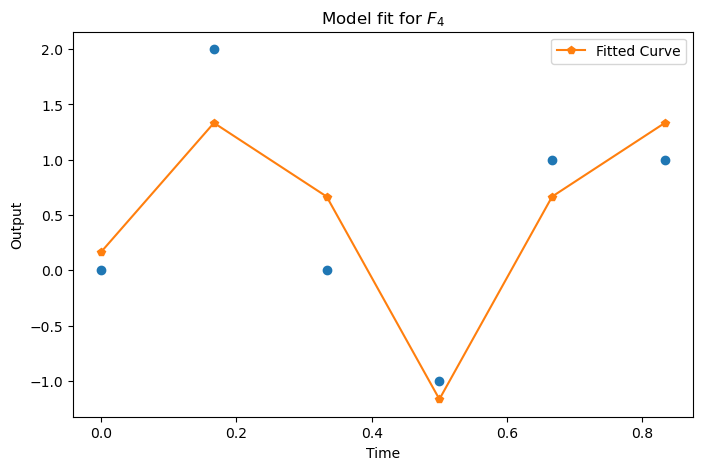

In [15]:
# plotting the fit of the F4 (with the help of AI)
plt.figure(figsize=(8,5))
plt.plot(t, y, 'o')
plt.plot(t, A2 @ c2, 'p-', label = 'Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Model fit for $F_4$')
plt.legend()
plt.grid(False)
plt.show()

The fit for $F_4$ appears to be better than that of $F_3$, which makes sense considering the error of the fit for $F_4$ was half that of $F_3$'s.